In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from functools import reduce

In [27]:
snotelBL = pd.read_table('SNOTEL-367.txt',comment='#', delimiter=',', usecols=(0,6))  # Brooklyn Lake 10/1980-present
snotelBL.columns = ['datetime','obs_precip']                           
snotelBL.loc[:,'obs_precip'] *= 25.4                               
snotelBL['datetime'] = pd.to_datetime(snotelBL['datetime'], format='%Y-%m-%d')  
#snotelBL.head(5)         

In [26]:
vicBL = pd.read_table(r'C:\Users\carrie.morrill\Jupyter\LIVNEH-qmap-data\livneh_NAmerExt_q_1Sep2016.1915-2015_41.34375_-106.21875.txt', 
                      header = None, delim_whitespace=True, usecols=range(0,1))
vicBL.columns = ['model_precip']                          
vicBL['datetime'] = pd.date_range(start='1/1/1915',end='12/31/2015')
#vicBL.head(5)
# SNOTEL station: 41.37 -106.23 3121 meters IOWA ST. MESONET = 41.35885, -106.23209
# VIC grid cell: 41.34375 -106.21875 2970 meters (427, 300) ** IN THIS GRID CELL

In [25]:
brook = pd.merge(snotelBL,vicBL,how='inner', left_on='datetime', right_on='datetime')  
brook = brook.dropna(axis=0, how='any')
print (brook['obs_precip'].mean()/brook['model_precip'].mean())
brook['Month'] = brook['datetime'].dt.month      # create Month column from datetime
brook['Year'] = brook['datetime'].dt.year     # create Month column from datetime
brook['WaterYear'] = np.where(brook['Month'] <=9, brook['Year'], brook['Year']+1)
#brook

0.9994823816264409


(0, 2.5)

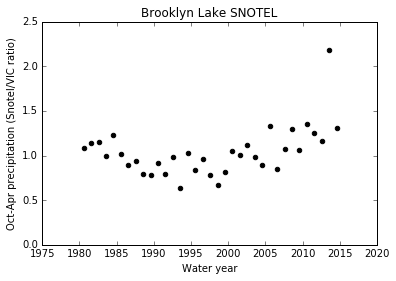

In [60]:
monthlyBL=brook.groupby(['Year','Month']).mean()
monthlyBL = monthlyBL.reset_index()
monthlyBL = monthlyBL[((monthlyBL.Month >=10) | (monthlyBL.Month <=4)) & (monthlyBL.WaterYear <=2015)]
yearlyBL = monthlyBL.groupby(['WaterYear']).mean()  # groupby Year and Month and take average of groups --> monthly averages
yearlyBL['ratio'] = np.where((yearlyBL['obs_precip']==0) & (yearlyBL['model_precip']==0), 1, 
                               yearlyBL['obs_precip']/yearlyBL['model_precip'])
#yearlyBL
plt.scatter(yearlyBL.Year,yearlyBL.ratio, linewidth=1.0, color='black')
plt.title("Brooklyn Lake SNOTEL")
plt.xlabel("Water year")
plt.ylabel("Oct-Apr precipitation (Snotel/VIC ratio)")
plt.ylim(0,2.5)

In [29]:
snotelSL = pd.read_table('SNOTEL-731.txt',comment='#', delimiter=',', usecols=(0,6))  # Sand Lake 10/1982-present
snotelSL.columns = ['datetime','obs_precip']                           
snotelSL.loc[:,'obs_precip'] *= 25.4                               # convert from inches to millimeters
snotelSL['datetime'] = pd.to_datetime(snotelSL['datetime'], format='%Y-%m-%d')  
#snotelSL                                                               

In [32]:
vicSL = pd.read_table(r'C:\Users\carrie.morrill\Jupyter\LIVNEH-qmap-data\livneh_NAmerExt_q_1Sep2016.1915-2015_41.46875_-106.28125.txt', 
        header = None, delim_whitespace=True, usecols=range(0,1))
vicSL.columns = ['model_precip']                          # rename columns
vicSL['datetime'] = pd.date_range(start='1/1/1915',end='12/31/2015')
#vicSL   
# SNOTEL station: 41.47 -106.28 10050 ft 3063 m  IOWA STATE MESONET: 41.46257 -106.28107
# VIC grid cell: (429, 299) 41.46875 -106.28125  3058.89 m 

In [35]:
sand = pd.merge(snotelSL,vicSL,how='inner',left_on='datetime', right_on='datetime')  # merge two data tables 
sand = sand.dropna(axis=0, how='any')
print (sand['obs_precip'].mean()/sand['model_precip'].mean())
sand['Month'] = sand['datetime'].dt.month      # create Month column from datetime
sand['Year'] = sand['datetime'].dt.year     # create Month column from datetime
sand['WaterYear'] = np.where(sand['Month'] <=9, sand['Year'], sand['Year']+1)
#sand

1.022750578945255


(0, 2.5)

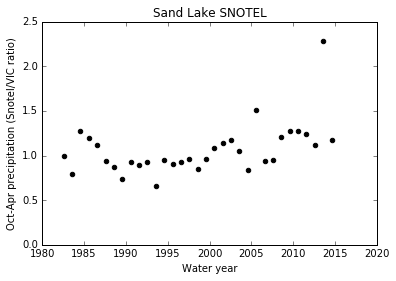

In [59]:
monthlySL = sand.groupby(['Year','Month']).mean()
monthlySL = monthlySL.reset_index()
monthlySL = monthlySL[((monthlySL.Month >=10) | (monthlySL.Month <=4)) & (monthlySL.WaterYear <=2015)]
yearlySL = monthlySL.groupby(['WaterYear']).mean()  # groupby Year and Month and take average of groups --> monthly averages
yearlySL['ratio'] = np.where((yearlySL['obs_precip']==0) & (yearlySL['model_precip']==0), 1, 
                               yearlySL['obs_precip']/yearlySL['model_precip'])
#yearlyBL
plt.scatter(yearlySL.Year,yearlySL.ratio, linewidth=1.0, color='black')
plt.title("Sand Lake SNOTEL")
plt.xlabel("Water year")
plt.ylabel("Oct-Apr precipitation (Snotel/VIC ratio)")
plt.ylim(0,2.5)

In [37]:
snotelSB = pd.read_table('SNOTEL-772.txt',comment='#', delimiter=',', usecols=(0,6))  # South Brush Creek 3/1979 - present
snotelSB.columns = ['datetime','obs_precip']                          
snotelSB.loc[:,'obs_precip'] *= 25.4                               
snotelSB['datetime'] = pd.to_datetime(snotelSB['datetime'], format='%Y-%m-%d')  
#snotelSB  

In [38]:
vicSB = pd.read_table(r'C:\Users\carrie.morrill\Jupyter\LIVNEH-qmap-data\livneh_NAmerExt_q_1Sep2016.1915-2015_41.34375_-106.53125.txt', 
        header = None, delim_whitespace=True, usecols=range(0,1))
vicSB.columns = ['model_precip']                          
vicSB['datetime'] = pd.date_range(start='1/1/1915',end='12/31/2015')
#vicSB   
# SNOTEL site: 41.33 -106.5  8440 ft 2572 m IOWA STATE MESONET: 41.32943 -106.50248
# VIC grid cell: 41.34375 -106.46875 (427, 296, 2710m)    ** ON EDGE OF THIS GRID CELL
# VIC grid cell: 41.34375 -106.53125 (427, 295, 2525m)    **IN THIS GRID CELL, BUT barely

In [39]:
brush = pd.merge(snotelSB,vicSB,how='inner', left_on='datetime', right_on='datetime')  
brush = brush.dropna(axis=0, how='any')
print (brush['obs_precip'].mean()/brush['model_precip'].mean())
brush['Month'] = brush['datetime'].dt.month      # create Month column from datetime
brush['Year'] = brush['datetime'].dt.year     # create Month column from datetime
brush['WaterYear'] = np.where(brush['Month'] <=9, brush['Year'], brush['Year']+1)
#brush

0.9923148589591395


(0, 2.5)

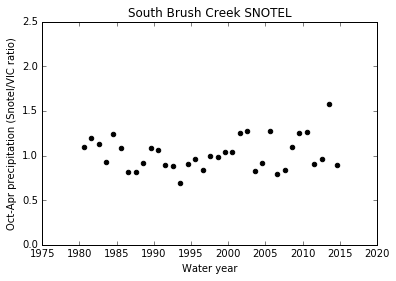

In [58]:
monthlySB = brush.groupby(['Year','Month']).mean()
monthlySB = monthlySB.reset_index()
monthlySB = monthlySB[((monthlySB.Month >=10) | (monthlySB.Month <=4)) & (monthlySB.WaterYear <=2015) & (monthlySB.WaterYear > 1979)]
yearlySB = monthlySB.groupby(['WaterYear']).mean()  # groupby Year and Month and take average of groups --> monthly averages
yearlySB['ratio'] = np.where((yearlySB['obs_precip']==0) & (yearlySB['model_precip']==0), 1, 
                               yearlySB['obs_precip']/yearlySB['model_precip'])
#yearlySB
plt.scatter(yearlySB.Year,yearlySB.ratio, linewidth=1.0, color='black')
plt.title("South Brush Creek SNOTEL")
plt.xlabel("Water year")
plt.ylabel("Oct-Apr precipitation (Snotel/VIC ratio)")
plt.ylim(0,2.5)

In [48]:
snotelNF = pd.read_table('SNOTEL-668.txt',comment='#', delimiter=',', usecols=(0,6))  # North French Creek 10/1978-present
snotelNF.columns = ['datetime','obs_precip']                           
snotelNF.loc[:,'obs_precip'] *= 25.4                              
snotelNF['datetime'] = pd.to_datetime(snotelNF['datetime'], format='%Y-%m-%d')  
#snotelNF  

In [49]:
vicNF = pd.read_table(r'C:\Users\carrie.morrill\Jupyter\LIVNEH-qmap-data\livneh_NAmerExt_q_1Sep2016.1915-2015_41.34375_-106.40625.txt', 
        header = None, delim_whitespace=True, usecols=range(0,1))
vicNF.columns = ['model_precip']                          # rename columns
vicNF['datetime'] = pd.date_range(start='1/1/1915',end='12/31/2015')
#vicNF      
# SNOTEL station: 41.33 -106.38 10130 feet elevation 3087 m IOWA STATE MESONET: 41.33080 -106.37555
# VIC grid cell: 427, 297 = 41.34375 -106.40625 2879 m     ** IN THIS GRID CELL
# VIC grid cell: 427, 298 = 41.34375 -106.34375  3029.68 m  ** ON EDGE OF THIS GRID CELL

In [50]:
french = pd.merge(snotelNF,vicNF,how='inner',left_on='datetime', right_on='datetime') 
french = french.dropna(axis=0, how='any')
print (french['obs_precip'].mean()/french['model_precip'].mean())
french['Month'] = french['datetime'].dt.month      # create Month column from datetime
french['Year'] = french['datetime'].dt.year     # create Month column from datetime
french['WaterYear'] = np.where(french['Month'] <=9, french['Year'], french['Year']+1)
#french

0.9847977577335734


(0, 2.5)

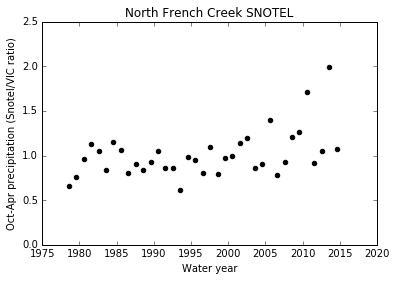

In [57]:
monthlyNF = french.groupby(['Year','Month']).mean()
monthlyNF = monthlyNF.reset_index()
monthlyNF = monthlyNF[((monthlyNF.Month >=10) | (monthlyNF.Month <=4)) & (monthlyNF.WaterYear <=2015)]
yearlyNF = monthlyNF.groupby(['WaterYear']).mean()  # groupby Year and Month and take average of groups --> monthly averages
yearlyNF['ratio'] = np.where((yearlyNF['obs_precip']==0) & (yearlyNF['model_precip']==0), 1, 
                               yearlyNF['obs_precip']/yearlyNF['model_precip'])
#yearlyNF
plt.scatter(yearlyNF.Year,yearlyNF.ratio, linewidth=1.0, color='black')
plt.title("North French Creek SNOTEL")
plt.xlabel("Water year")
plt.ylabel("Oct-Apr precipitation (Snotel/VIC ratio)")
plt.ylim(0,2.5)